In [76]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np 

In [77]:
# Chemin vers le fichier NetCDF
chemin_fichier_nc = 'data/France.nc'

# Chargement du fichier NetCDF
data = Dataset(chemin_fichier_nc, 'r')
print(data.variables.keys())

dict_keys(['longitude', 'latitude', 'level', 'time', 't'])


### Données pour un intervalle de temps entre octobre jusqu'à décembre 2023

In [78]:
print(data.variables.values())

dict_values([<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (1379,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (33,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 'netCDF4._netCDF4.Variable'>
int32 level(level)
    units: millibars
    long_name: pressure_level
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (6624,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int16 t(time, level, latitude, longitude)
    scale_factor: 0.0012

In [79]:
print(data.variables['t'])

<class 'netCDF4._netCDF4.Variable'>
int16 t(time, level, latitude, longitude)
    scale_factor: 0.0012682104344286704
    add_offset: 280.87448033570075
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Temperature
    standard_name: air_temperature
unlimited dimensions: 
current shape = (6624, 2, 33, 1379)
filling on


In [80]:
print(data.variables['time'][:]) #timestamp

[ 354264  354265  354266 ... 1084029 1084030 1084031]


In [81]:
times = data.variables['time']

### Référence Unité de date par défaut 

In [82]:
times_unit = data.variables["time"].units
print(times_unit) 

hours since 1900-01-01 00:00:00.0


In [83]:
temp_unit = data.variables['t'].units
print(temp_unit)

K


#### Transformer les données sous format date XXXX-XX-XX

In [84]:
import datetime
ref_date = datetime.date(int(times_unit[12:16]),int(times_unit[17:19]),int(times_unit[20:22]))
print(ref_date) 

1900-01-01


Conversion de données sur le temps en années jusqu'en heures 

In [85]:
print(int(times[0])) #1084752 heures => 1458 mois =>  121 années 

354264


Date intiale pour trouver la date du début sur le dataset

In [86]:
start_date = ref_date + datetime.timedelta(hours=int(times[0]))
print(start_date)

1940-06-01


Date de fin (qui ne prend pas les 6 derniers jours derriere)

In [87]:
end_date = ref_date + datetime.timedelta(hours=int(times[-1]))
print(end_date)

2023-08-31


In [88]:
next_date = end_date + datetime.timedelta(days=1)
print(next_date)

2023-09-01


In [89]:
date_range = pd.date_range(start= start_date,end = end_date,freq="H")
print(date_range)
print(type(date_range))

DatetimeIndex(['1940-06-01 00:00:00', '1940-06-01 01:00:00',
               '1940-06-01 02:00:00', '1940-06-01 03:00:00',
               '1940-06-01 04:00:00', '1940-06-01 05:00:00',
               '1940-06-01 06:00:00', '1940-06-01 07:00:00',
               '1940-06-01 08:00:00', '1940-06-01 09:00:00',
               ...
               '2023-08-30 15:00:00', '2023-08-30 16:00:00',
               '2023-08-30 17:00:00', '2023-08-30 18:00:00',
               '2023-08-30 19:00:00', '2023-08-30 20:00:00',
               '2023-08-30 21:00:00', '2023-08-30 22:00:00',
               '2023-08-30 23:00:00', '2023-08-31 00:00:00'],
              dtype='datetime64[ns]', length=729745, freq='H')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [90]:
df = pd.DataFrame(date_range,columns = ["Date-Time"])
df["Date-Time"] = date_range
#df = df.set_index(["Date-Time"])
#print(df)

In [91]:
print(df)

                 Date-Time
0      1940-06-01 00:00:00
1      1940-06-01 01:00:00
2      1940-06-01 02:00:00
3      1940-06-01 03:00:00
4      1940-06-01 04:00:00
...                    ...
729740 2023-08-30 20:00:00
729741 2023-08-30 21:00:00
729742 2023-08-30 22:00:00
729743 2023-08-30 23:00:00
729744 2023-08-31 00:00:00

[729745 rows x 1 columns]


In [92]:
#print(type(df["Date-Time"]))
df["days"] =  df["Date-Time"].dt.day
df["month"] =  df["Date-Time"].dt.month
#df["year"] =  df["Date-Time"].dt.year  #Plus tard si on souhaite prendre plusieurs années
df["hour"] = df["Date-Time"].dt.hour

print(df)

                 Date-Time  days  month  hour
0      1940-06-01 00:00:00     1      6     0
1      1940-06-01 01:00:00     1      6     1
2      1940-06-01 02:00:00     1      6     2
3      1940-06-01 03:00:00     1      6     3
4      1940-06-01 04:00:00     1      6     4
...                    ...   ...    ...   ...
729740 2023-08-30 20:00:00    30      8    20
729741 2023-08-30 21:00:00    30      8    21
729742 2023-08-30 22:00:00    30      8    22
729743 2023-08-30 23:00:00    30      8    23
729744 2023-08-31 00:00:00    31      8     0

[729745 rows x 4 columns]


In [93]:
list_hour = df["hour"].tolist()
list_days = df["days"].tolist()
list_month = df["month"].tolist()
    
print("Liste des heures",list_hour)
print("Liste des jours",list_days)
print("Liste des mois",list_month)


Liste des heures [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

In [94]:
#print(data['t'][:])
#df["Temperature"] = data['t'][0]
print(data['t'][0][0][0])

[248.9650376  249.24658031 249.54334155 ... 258.19507314 258.07966599
 257.94904031]


In [95]:
print(data['level'][0]) #Pression 500ha
print(data['level'][1]) #Pression 1000ha

500
1000


In [96]:
print(data.variables['longitude']) 

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (1379,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [97]:
print(data['longitude'][:])  #Coordonnées Longitude 

[  9.75  10.    10.25 ... 353.75 354.   354.25]


In [98]:
print(data['latitude'][:]) #Coordonnées Latitude

[51.75 51.5  51.25 51.   50.75 50.5  50.25 50.   49.75 49.5  49.25 49.
 48.75 48.5  48.25 48.   47.75 47.5  47.25 47.   46.75 46.5  46.25 46.
 45.75 45.5  45.25 45.   44.75 44.5  44.25 44.   43.75]


In [99]:
print(type(data['latitude'][:]))

<class 'numpy.ma.core.MaskedArray'>


In [100]:
import numpy as np
import csv

# Création des données de latitude et de longitude initiales (exemples)
latitude = data['latitude'][:]
longitude = data['longitude'][:]

# Écriture des données de latitude et de longitude dans un même fichier CSV
fichier_lat_long = 'data/nouvelles_coordonnees.csv'

with open(fichier_lat_long, 'w', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(['Latitude', 'Longitude'])
    for lat, lon in zip(latitude, longitude):
        csv_writer.writerow([lat, lon])

print(f"Données de latitude et longitude écrites dans : {fichier_lat_long}")

Données de latitude et longitude écrites dans : data/nouvelles_coordonnees.csv


In [101]:
print(len(data['latitude']))
print(len(data['longitude']))

33
1379


In [102]:
#Valeurs Définies
# Latitudes ",
point_lat = np.arange(28, 19.75, -0.25)
point_long = np.arange(364, 19.25, -0.25)
print(len(point_lat))
print(len(point_long))

long = data['longitude'][:]
lat = data['latitude'][:]

diff_long = []
diff_lat = []

33
1379


Lorsque vous faites latitude - point_lat[:, None], la partie [:, None] ajoute une nouvelle dimension à point_lat, transformant sa forme de (m,) en (m, 1), ce qui lui permet d'être compatible pour la soustraction avec latitude qui a la forme (n,). Cela permet à NumPy de diffuser les valeurs correctement pour effectuer la soustraction élément par élément.

Ainsi, l'ajout de None (ou np.newaxis) dans ce contexte permet d'adapter les dimensions des tableaux pour que les opérations arithmétiques puissent être effectuées conformément aux règles de diffusion (broadcasting) de NumPy.

In [103]:
import numpy as np

# Supposons que data['latitude'][:] et data['longitude'][:] sont vos données de latitude et longitude respectivement
# Déclaration des variables
point_lat = np.arange(28, -19.75, -0.25)
point_long = np.arange(19.25, 364, 0.25)

# Exemple de données pour latitude et longitude
latitude = data['latitude'][:]
longitude = data['longitude'][:]

# Calcul des différences au carré
diff_lat = np.around((latitude - point_lat[:, None])**2,decimals=2)  # Calcul de la différence entre latitude et point_lat
diff_long = np.around((longitude - point_long[:, None])**2,decimals=2)  # Calcul de la différence entre longitude et point_long

In [104]:
# Affichage des différences au carré
print("Différences au carré pour la latitude :")
print(diff_lat)


Différences au carré pour la latitude :
[[ 564.06  552.25  540.56 ...  264.06  256.    248.06]
 [ 576.    564.06  552.25 ...  272.25  264.06  256.  ]
 [ 588.06  576.    564.06 ...  280.56  272.25  264.06]
 ...
 [5005.56 4970.25 4935.06 ... 4000.56 3969.   3937.56]
 [5041.   5005.56 4970.25 ... 4032.25 4000.56 3969.  ]
 [5076.56 5041.   5005.56 ... 4064.06 4032.25 4000.56]]


In [105]:
print("\nDifférences au carré pour la longitude :")
print(diff_long)


Différences au carré pour la longitude :
[[9.0250000e+01 8.5560000e+01 8.1000000e+01 ... 1.1189025e+05
  1.1205756e+05 1.1222500e+05]
 [9.5060000e+01 9.0250000e+01 8.5560000e+01 ... 1.1172306e+05
  1.1189025e+05 1.1205756e+05]
 [1.0000000e+02 9.5060000e+01 9.0250000e+01 ... 1.1155600e+05
  1.1172306e+05 1.1189025e+05]
 ...
 [1.2496225e+05 1.2478556e+05 1.2460900e+05 ... 9.0250000e+01
  8.5560000e+01 8.1000000e+01]
 [1.2513906e+05 1.2496225e+05 1.2478556e+05 ... 9.5060000e+01
  9.0250000e+01 8.5560000e+01]
 [1.2531600e+05 1.2513906e+05 1.2496225e+05 ... 1.0000000e+02
  9.5060000e+01 9.0250000e+01]]


In [106]:
min_index_lat = diff_lat.argmin()
min_index_lon = diff_long.argmin()
print(min_index_lat)
print(min_index_lon)

32
38


### Script FINAL


In [154]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np  
import os 
import datetime

point_lat = np.arange(28, -19.75, -0.25)
point_long = np.arange(19.25, 364, 0.25)

# Chemin vers le fichier NetCDF
chemin_fichier_nc = 'data/France_2.nc'

# Chargement du fichier NetCDF
data = Dataset(chemin_fichier_nc, 'r')

times = data.variables['time'][:]
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
unit = data.variables['time'].units
unitt = data.variables['t'].units
temp = data.variables['t']

# Calcul des différences au carré
diff_lat = np.around((latitude - point_lat[:, None])**2,decimals=2)  # Calcul de la différence entre latitude et point_lat
diff_long = np.around((longitude - point_long[:, None])**2,decimals=2)  # Calcul de la différence entre longitude et point_long

#Minimum
min_index_lat = diff_lat.argmin()
min_index_lon = diff_long.argmin()

ref_date = datetime.datetime(int(times_unit[12:16]),int(times_unit[17:19]),int(times_unit[20:22]))
date_range = list()

temp_data_500 = list()
temp_data_1000 = list()

for index, time, in enumerate(times):
    date_time = ref_date + datetime.timedelta(hours=int(time))
    date_range.append(date_time)
    temp_data_500.append(temp[index,0,min_index_lat,min_index_lon])
    temp_data_1000.append(temp[index,1,min_index_lat,min_index_lon])

df = pd.DataFrame(date_range,columns = ["Date-Time"])
df["Date-Time"] = date_range
df = df.set_index(["Date-Time"])
df["Température à 500hPa ({})".format(unitt)] = temp_data_500
df["Température à 1000hPa ({})".format(unitt)] = temp_data_1000


In [155]:
print(df)

                     Température à 500hPa (K)  Température à 1000hPa (K)
Date-Time                                                               
2021-06-01 00:00:00                249.012560                 285.429162
2021-06-01 01:00:00                248.665997                 285.194182
2021-06-01 02:00:00                248.416578                 284.989395
2021-06-01 03:00:00                248.209165                 284.648084
2021-06-01 04:00:00                248.064764                 284.452487
...                                       ...                        ...
2023-08-31 19:00:00                260.639460                 295.836531
2023-08-31 20:00:00                260.694595                 295.261553
2023-08-31 21:00:00                260.631584                 294.515919
2023-08-31 22:00:00                261.446793                 292.973454
2023-08-31 23:00:00                261.406098                 292.667587

[6624 rows x 2 columns]


In [110]:
#df.to_csv(os.path.join("./data","temp.csv"),index=True)

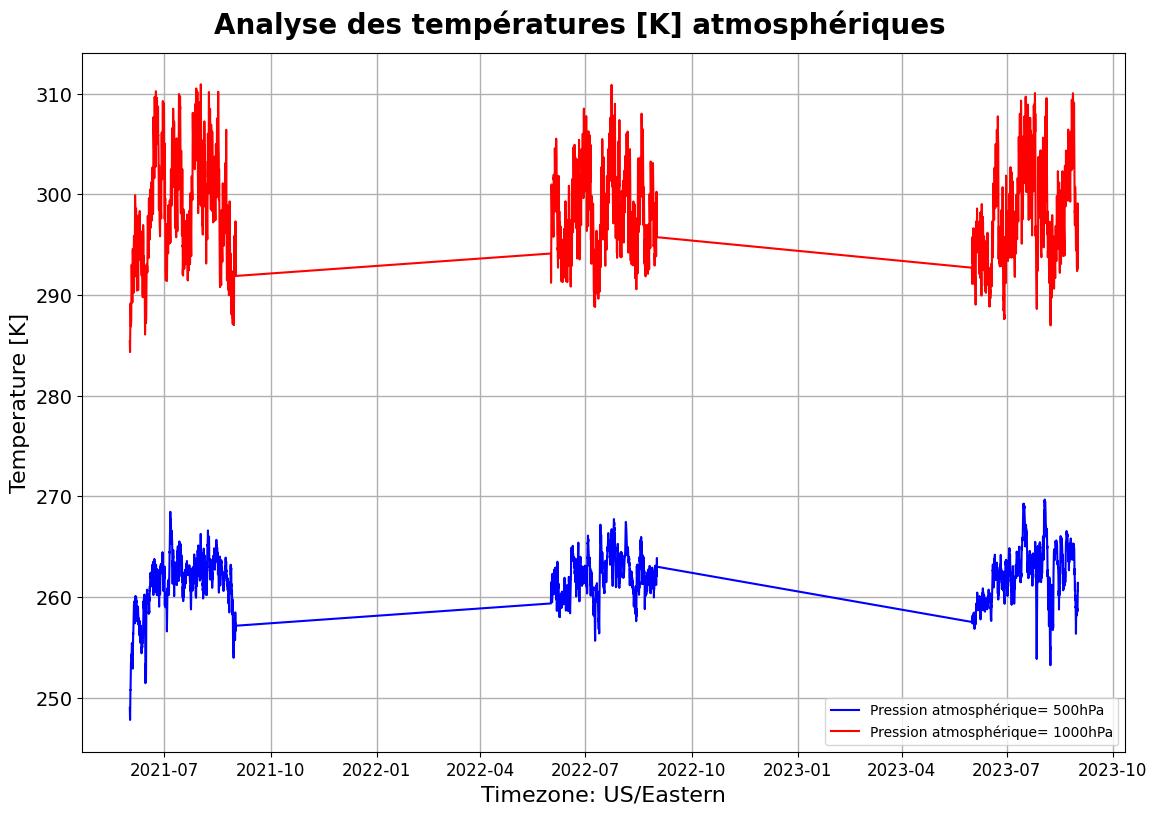

In [158]:
import matplotlib.pyplot as plt

Title = "Analyse des températures [K] atmosphériques"
fig, ax = plt.subplots(figsize=(11.69,8.27))
plt.grid(linestyle="-",linewidth=1.0)
fig.suptitle(Title,fontsize=20,weight='bold')
ax.plot(df.index,df["{}".format(df.columns[0])],color="blue",label='Pression atmosphérique= 500hPa')
ax.plot(df.index,df["{}".format(df.columns[1])],color="red",label='Pression atmosphérique= 1000hPa')
ax.set_xlabel("Timezone: US/Eastern", fontsize = 16) 
ax.set_ylabel(f"Temperature [{unitt}]",fontsize = 16)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(labelsize=14) 
fig.tight_layout()
plt.legend()
plt.show()

In [168]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Sélection de la série temporelle à utiliser (par exemple, la température à 500 hPa)
time_series = df["Température à 500hPa ({})".format(unitt)]

# Division des données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement, 20% pour le test)
train_data, test_data = train_test_split(time_series, test_size=0.2, shuffle=False)

print(test_data)
print(train_data)

Date-Time
2023-07-07 19:00:00    260.017223
2023-07-07 20:00:00    260.337531
2023-07-07 21:00:00    260.552820
2023-07-07 22:00:00    260.565947
2023-07-07 23:00:00    260.730039
                          ...    
2023-08-31 19:00:00    260.639460
2023-08-31 20:00:00    260.694595
2023-08-31 21:00:00    260.631584
2023-08-31 22:00:00    261.446793
2023-08-31 23:00:00    261.406098
Name: Température à 500hPa (K), Length: 1325, dtype: float64
Date-Time
2021-06-01 00:00:00    249.012560
2021-06-01 01:00:00    248.665997
2021-06-01 02:00:00    248.416578
2021-06-01 03:00:00    248.209165
2021-06-01 04:00:00    248.064764
                          ...    
2023-07-07 14:00:00    259.421241
2023-07-07 15:00:00    259.418616
2023-07-07 16:00:00    259.354292
2023-07-07 17:00:00    259.489504
2023-07-07 18:00:00    259.653596
Name: Température à 500hPa (K), Length: 5299, dtype: float64


In [169]:
# Création et ajustement du modèle ARIMA
# Utilisation des ordres (p, d, q) spécifiques (ceux-ci peuvent nécessiter une analyse préalable)
p, d, q = 5, 1, 2  # Exemple d'ordres
model = ARIMA(train_data, order=(p, d, q))
fitted_model = model.fit()

# Prédictions sur l'ensemble de test
predictions = fitted_model.forecast(steps=len(test_data))

print(predictions)

d:\Vincent\Logiciels\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Vincent\Logiciels\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Vincent\Logiciels\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5299    259.641157
5300    259.639969
5301    259.668705
5302    259.665432
5303    259.645926
           ...    
6619    259.657960
6620    259.657960
6621    259.657960
6622    259.657960
6623    259.657960
Name: predicted_mean, Length: 1325, dtype: float64


d:\Vincent\Logiciels\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Vincent\Logiciels\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


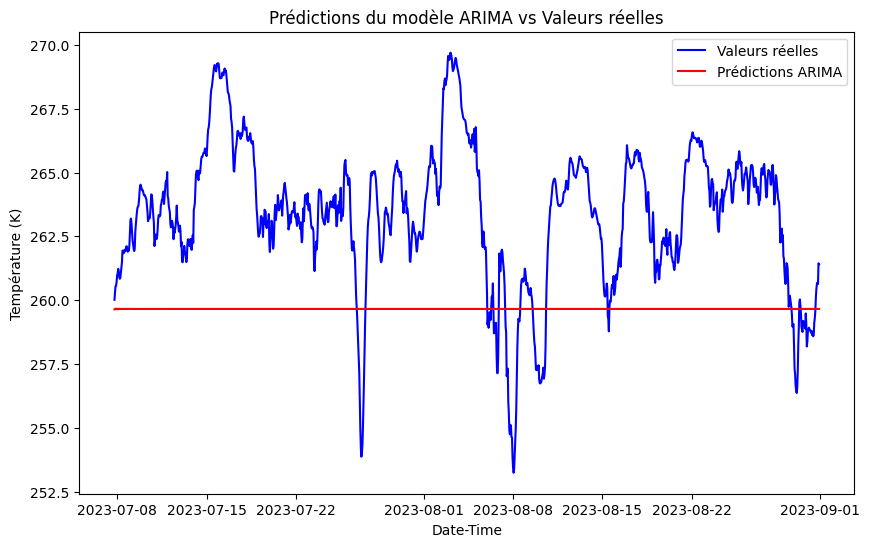

In [170]:
# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Valeurs réelles', color='blue')
plt.plot(test_data.index, predictions, label='Prédictions ARIMA', color='red')
plt.title('Prédictions du modèle ARIMA vs Valeurs réelles')
plt.xlabel('Date-Time')
plt.ylabel('Température (K)')
plt.legend()
plt.show()